<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-10 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Simple AutoEncoders with Image Data </h2> </html>

Here is a simple autoencoder with just the dense layers.


Load the data and import the libraries.

In [1]:
# Your code to import matplotlib, pandas and numpy libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


_______________________![image.png](attachment:a4e07154-e766-4e74-a203-c09e7605ea7b.png)

In [2]:
import tensorflow as tf
from tensorflow import keras

__________________![image.png](attachment:06d151d2-f461-411d-8325-a4a6287cfd48.png)

In [3]:
print(tf.__version__)

2.18.0


2.18.0


____________________![image.png](attachment:3ff556fc-1f76-4be4-a216-1e8aecd11e54.png)

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [5]:
# Your code to load MNIST data and store it in variables x_train, x_test.
# Note -  we do not need labels as it's autoencoder.

#
(x_train,_), (x_test, _)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


______________________![image.png](attachment:74823cdf-09eb-4a7a-8a39-8c306d6de031.png)

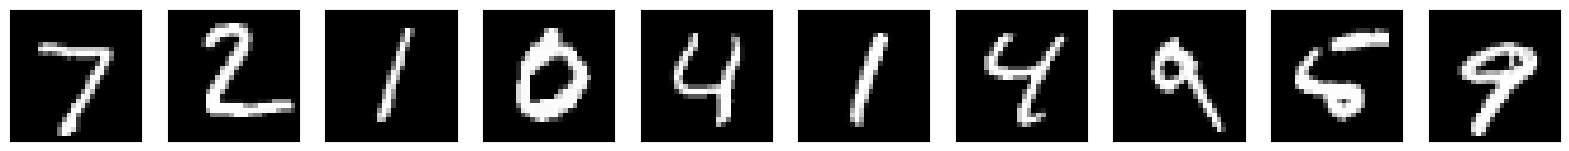

In [6]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

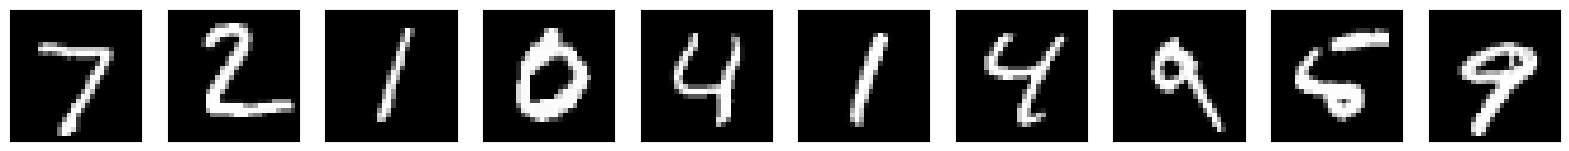

In [7]:
# Your code to
# normalise train data - Divided by 255

x_train=x_train/255
x_test=x_test/255

# normalise test data - Divided by 255

#


<html> <h3 style="font-style:italic; color:blue;"> Basic AutoEncoder : </h3> </html>

Build a basic symmetric encoder-decoder network that recreates the image.  
This network could be used in dimensionaliry reduction or feature learning.


________________________![image.png](attachment:de80ae8e-d8d5-4cfc-a51b-a2f7d50dc7c2.png)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add as many layers in the Encoder network of your choice
encoder.add(Dense(550, activation='relu'))
encoder.add(Dense(225, activation='relu'))
encoder.add(Dense(114, activation='relu'))
encoder.add(Dense(57, activation='relu'))
encoder.add(Dense(28, activation='relu'))
# The last TWO layers of the Encoder and Decoder must be matched (see the following decoder cell)

#
#


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Your code to print your Encoder model

print(encoder.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 550)                 │         431,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 225)                 │         123,975 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 114)                 │          25,764 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 57)                  │           6,555 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 28)                  │           1,624 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 589,668 (2.25 MB)

 Trainable params: 589,668 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Your OWN Encoder model should be printed here
# Please do not copy the model below

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
decoder = Sequential()
decoder.add(Dense(57,input_shape=[28],activation='relu'))

# Add as many layers in the Decoder as you want.
# Reember - Encoder and Decoder must be symmetric.

decoder.add(Dense(114, activation='relu'))
decoder.add(Dense(225, activation='relu'))
decoder.add(Dense(550, activation='relu'))


decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Your code to print the Decoder model

print(decoder.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 57)                  │           1,653 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 114)                 │           6,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 225)                 │          25,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 550)                 │         124,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │         431,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 590,424 (2.25 MB)

 Trainable params: 590,424 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Your OWN Decoder model should be printed here
# Please do not copy the model below

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


____________________![image.png](attachment:a94c2e5b-e27d-4e12-84c9-116a2f70e393.png)

In [13]:
autoencoder=Sequential([encoder, decoder])

In [14]:
# Your code to print the Autoencoder model

print(autoencoder.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28)                  │         589,668 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28)              │         590,424 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180,092 (4.50 MB)

 Trainable params: 1,180,092 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Your OWN Autoencoder model should be printed here

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#SGD?

In [15]:
# Your code to compile the Autoencoder.
# Use binary_crossenropy as loss and metrics as accuracy.

#
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

___________________![image.png](attachment:c8684fc7-fcb0-48bf-87e8-f70857a0fc4e.png)

In [16]:
history=autoencoder.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 27ms/step - accuracy: 0.1443 - loss: 0.2103 - val_accuracy: 0.2292 - val_loss: 0.1278
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.2387 - loss: 0.1242 - val_accuracy: 0.2415 - val_loss: 0.1164
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.2533 - loss: 0.1153 - val_accuracy: 0.2531 - val_loss: 0.1132
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.2628 - loss: 0.1112 - val_accuracy: 0.2624 - val_loss: 0.1098
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.2667 - loss: 0.1090 - val_accuracy: 0.2509 - val_loss: 0.1089
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2720 - loss: 0.1065 - val_accuracy: 0.2730 - val_loss: 0.1060
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.2748 - loss: 0.1044 - val_accuracy: 0.2646 - val_loss: 0.1044
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.2782 -

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.1292 - loss: 0.2204 - val_accuracy: 0.2148 - val_loss: 0.1363
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2276 - loss: 0.1322 - val_accuracy: 0.2359 - val_loss: 0.1228
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2437 - loss: 0.1210 - val_accuracy: 0.2509 - val_loss: 0.1165
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2539 - loss: 0.1154 - val_accuracy: 0.2514 - val_loss: 0.1127
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2595 - loss: 0.1113 - val_accuracy: 0.2601 - val_loss: 0.1081
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.2673 - loss: 0.1067 - val_accuracy: 0.2640 - val_loss: 0.1048
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2730 - loss: 0.1036 - val_accuracy: 0.2721 - val_loss: 0.1020
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2760 -

____________________![image.png](attachment:30a3bc58-49bd-4849-8c76-e2551d3a033b.png)

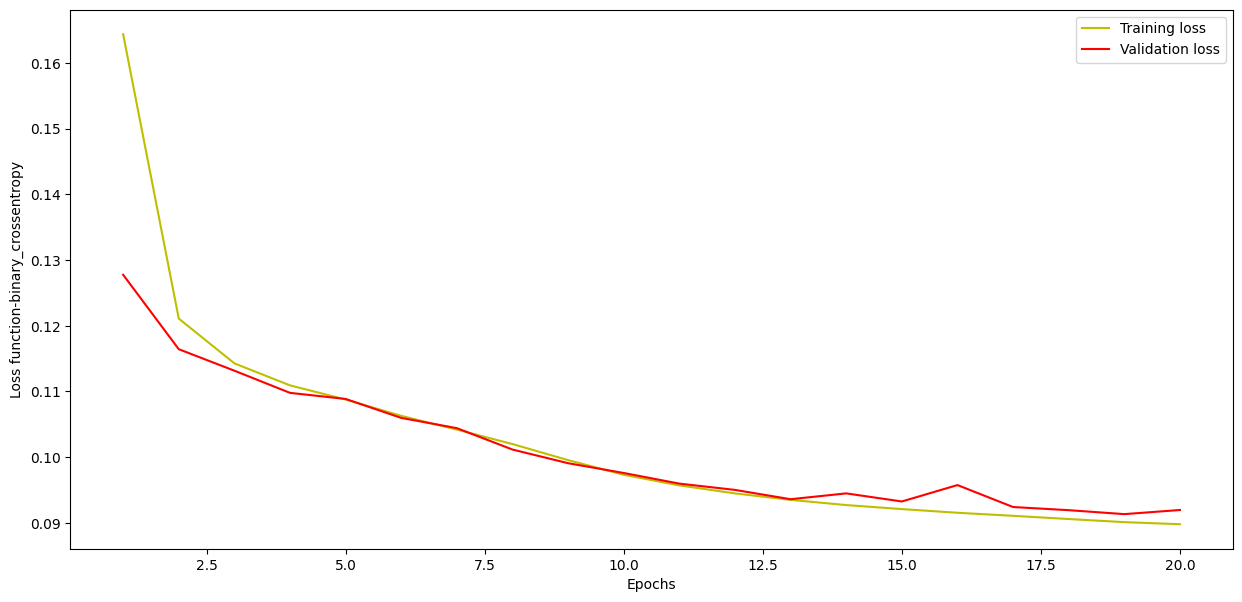

In [17]:
losses=history.history['loss']
val_losses=history.history['val_loss']
epochs=range(1, len(losses)+1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'y', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function-binary_crossentropy')
plt.legend()
plt.show()

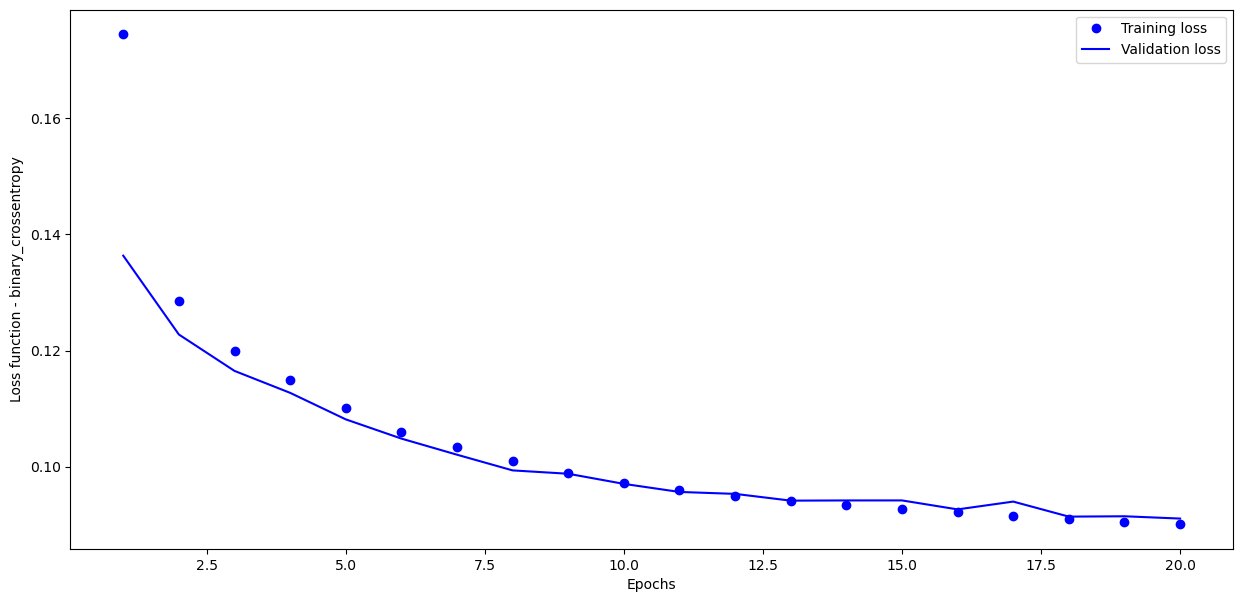

___________________![image.png](attachment:b2f19fbc-57fa-40f7-80a1-336642829de1.png)

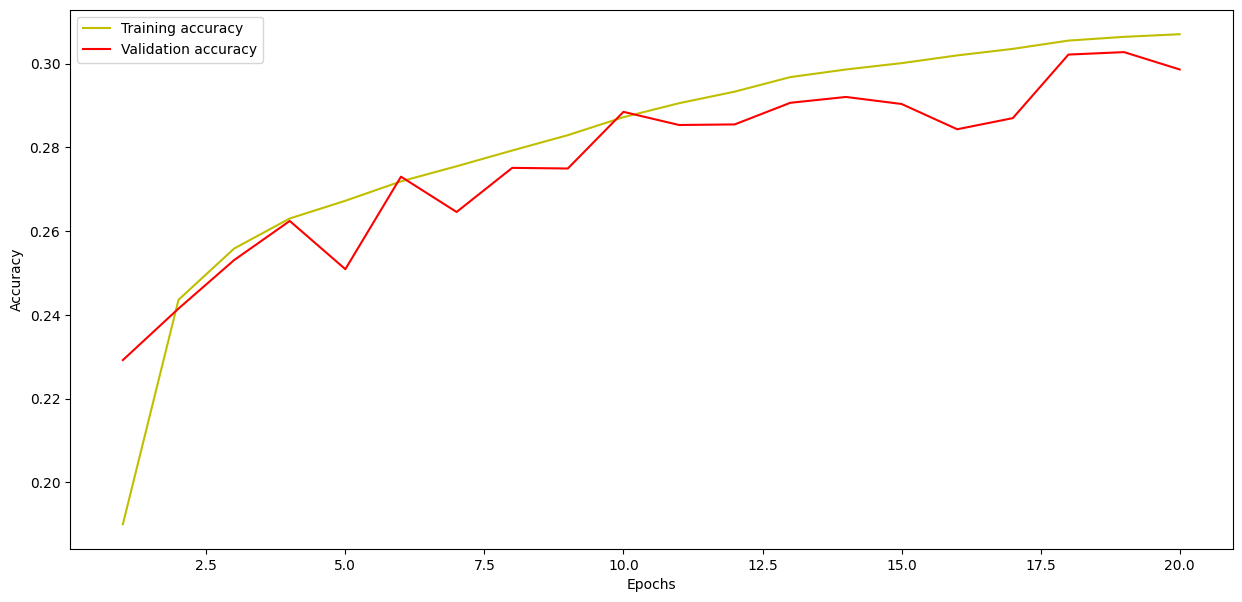

In [18]:
accuracy_array=history.history['accuracy']
val_accuracy_array=history.history['val_accuracy']
epochs=range(1, len(accuracy_array)+1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

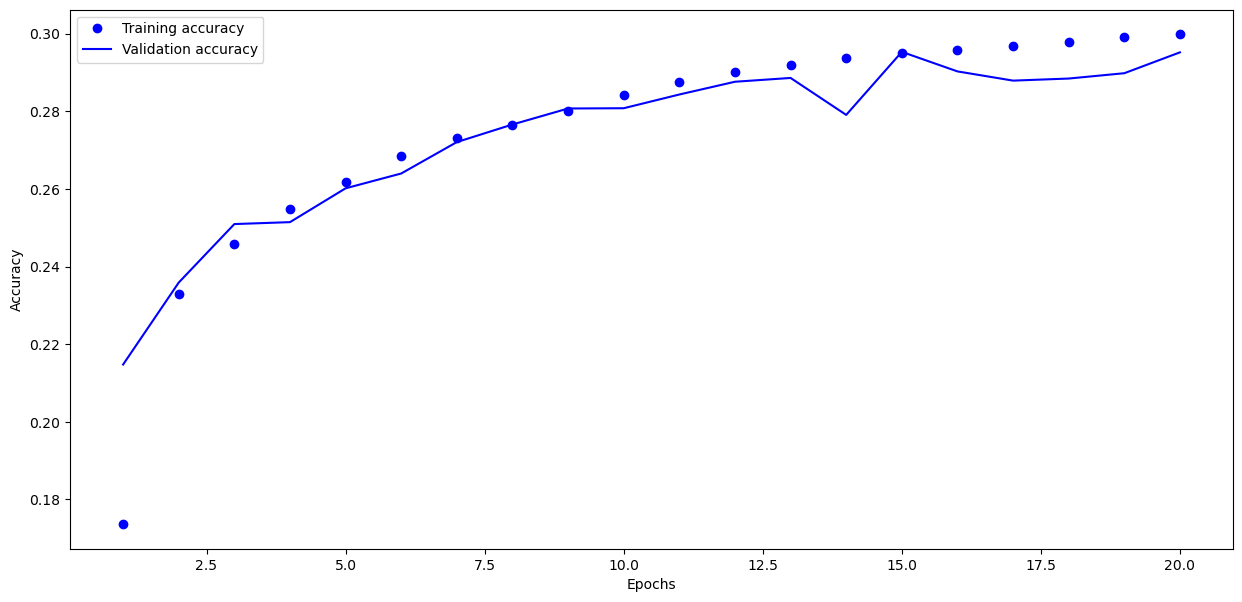

_______________________![image.png](attachment:39f152ac-8692-403f-a1c4-3a71fe4fd978.png)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


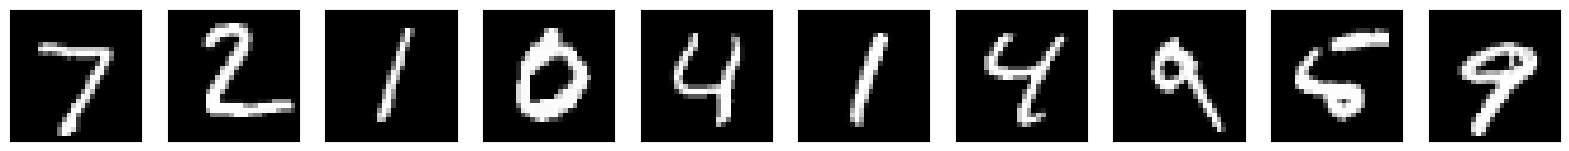

In [19]:
decoded_imgs=autoencoder.predict(x_test)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


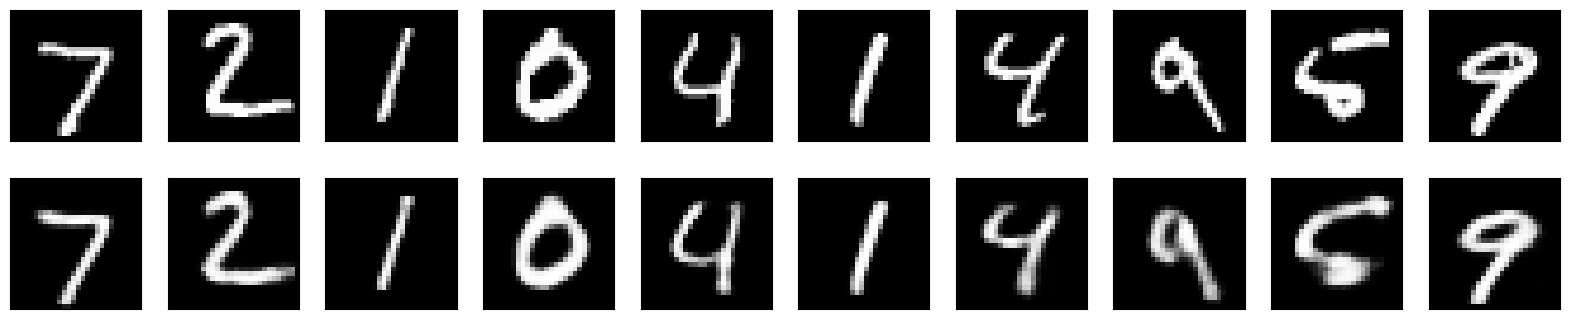

<html> <h3 style="font-style:italic; color:blue;"> AutoEncoders for Denoising Images : </h3> </html>

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples.


______________________![image.png](attachment:66c883c0-27ea-473a-bfbf-adf60d8af39f.png)

In [20]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
#GaussianNoise?

___________________![image.png](attachment:daef4479-63f7-4a6a-9927-be13f2230632.png)

In [21]:
sample=GaussianNoise(0.2)
noisey=sample(x_test[0:2], training=True)

In [ ]:
# Plot the original and noisy images

_______________________![image.png](attachment:4013cb09-7c0a-4cc7-b208-31bda1d0f668.png)

In [22]:
x_test[0].size

784

784

____________________![image.png](attachment:2e2bac52-3120-4879-9117-f71bdf1ac965.png)

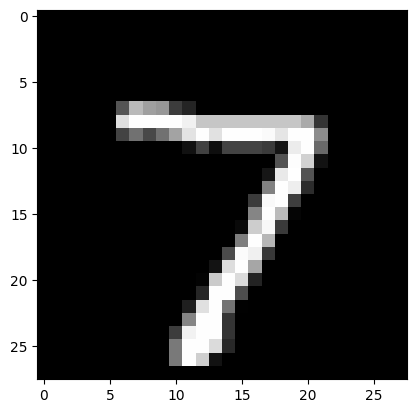

In [23]:
plt.imshow(x_test[0])
plt.show()

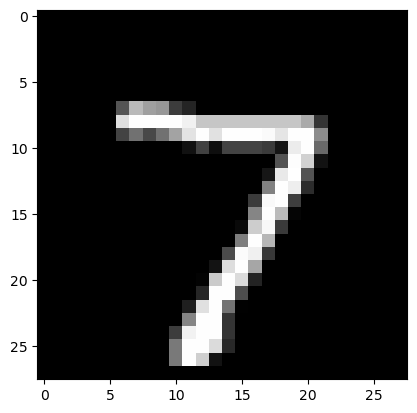

_____________________![image.png](attachment:003958e0-35f7-4d32-8faf-b9486b5d206f.png)

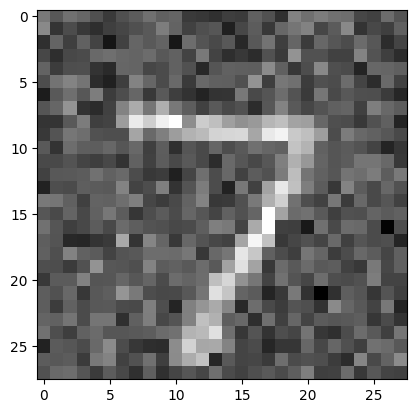

In [24]:
plt.imshow(noisey[0])
plt.show()

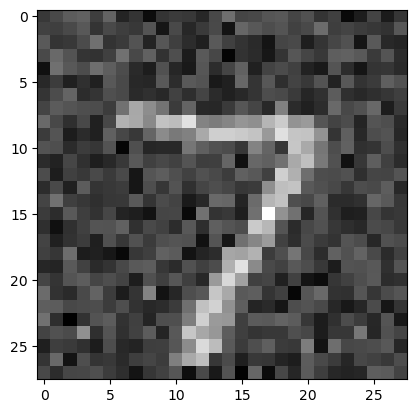

_________![image.png](attachment:dd745f81-2f9e-4b45-b030-3a4529ea6f1d.png)

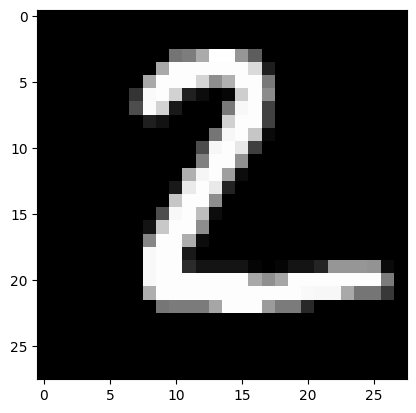

In [25]:
plt.imshow(x_test[1])
plt.show()

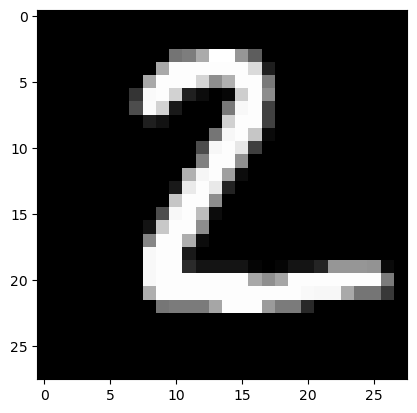

______________________![image.png](attachment:cf4f913b-10d4-47b9-9d91-b22fd1c175fa.png)

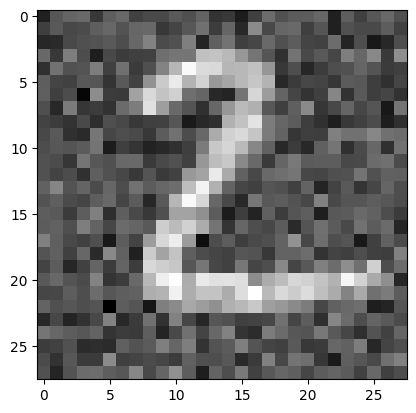

In [26]:
plt.imshow(noisey[1])
plt.show()

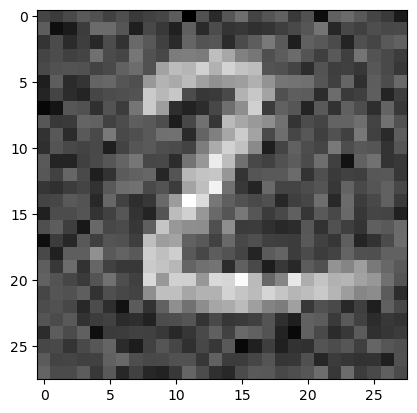

<html> <h4 style="font-style:italic; color:blue;"> Create a noise removal autoencoder and train it </h4> </html>

- Again similar to above it is a symmetric dense network.
- Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs.


### Input - Images with noise
### Labels - Clean images.


In [27]:
# Encoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy images

# Add layers of Encoder network. You could use the same number of layers as you created earlier

encoder.add(Dense(550, activation='relu'))
encoder.add(Dense(225, activation='relu'))
encoder.add(Dense(114, activation='relu'))
encoder.add(Dense(57, activation='relu'))
encoder.add(Dense(28, activation='relu'))

print(encoder.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 550)                 │         431,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 225)                 │         123,975 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 114)                 │          25,764 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 57)                  │           6,555 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 28)                  │           1,624 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 589,668 (2.25 MB)

 Trainable params: 589,668 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Your OWN Encoder model should be printed here
# Please do not copy the model below

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 784)            │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,625 (1.60 MB)

 Trainable params: 420,625 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
decoder = Sequential()
decoder.add(Dense(57,input_shape=[28],activation='relu'))

# Add layers of the Decoder network. You could use the same number of layers as you created earlier
# Reember - Encoder and Decoder must be symmetric

decoder.add(Dense(114, activation='relu'))
decoder.add(Dense(225, activation='relu'))
decoder.add(Dense(550, activation='relu'))




decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

print(decoder.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 57)                  │           1,653 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 114)                 │           6,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 225)                 │          25,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 550)                 │         124,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 784)                 │         431,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 590,424 (2.25 MB)

 Trainable params: 590,424 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Your OWN Decoder model should be printed here
# Please do not copy the model below

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │       314,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,384 (1.61 MB)

 Trainable params: 421,384 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


_________________________![image.png](attachment:b8742807-43dd-41a1-a461-c2a4455e6d07.png)

In [29]:
noise_remover=Sequential([encoder, decoder])

In [30]:
# Your code to print the Autoencoder model

noise_remover.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 28)                  │         589,668 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 28, 28)              │         590,424 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180,092 (4.50 MB)

 Trainable params: 1,180,092 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Your OWN Autoencoder model should be printed here

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 25)             │       420,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 28, 28)         │       421,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,009 (3.21 MB)

 Trainable params: 842,009 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
# Your code to compile the 'noise_remover' model with the same parameters as earlier

noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
# Your code to fit 'noise_remover' model with the same parameters as earlier

history_2 = noise_remover.fit(x_train, x_train, epochs=20, validation_data=[x_test, x_test])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 25ms/step - accuracy: 0.1435 - loss: 0.2097 - val_accuracy: 0.2332 - val_loss: 0.1288
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2349 - loss: 0.1283 - val_accuracy: 0.2520 - val_loss: 0.1167
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.2493 - loss: 0.1186 - val_accuracy: 0.2580 - val_loss: 0.1095
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.2568 - loss: 0.1131 - val_accuracy: 0.2634 - val_loss: 0.1057
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2631 - loss: 0.1100 - val_accuracy: 0.2653 - val_loss: 0.1057
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.2672 - loss: 0.1081 - val_accuracy: 0.2747 - val_loss: 0.1032
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.2728 - loss: 0.1058 - val_accuracy: 0.2743 - val_loss: 0.1014
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.2758 -

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 0.1332 - loss: 0.2187 - val_accuracy: 0.2117 - val_loss: 0.1395
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.2224 - loss: 0.1391 - val_accuracy: 0.2359 - val_loss: 0.1271
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.2384 - loss: 0.1277 - val_accuracy: 0.2476 - val_loss: 0.1192
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.2482 - loss: 0.1217 - val_accuracy: 0.2563 - val_loss: 0.1146
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2553 - loss: 0.1174 - val_accuracy: 0.2617 - val_loss: 0.1124
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.2578 - loss: 0.1149 - val_accuracy: 0.2522 - val_loss: 0.1105
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.2612 - loss: 0.1129 - val_accuracy: 0.2681 - val_loss: 0.1079
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.2652 -

In [ ]:
# Hint: Use (copy and modify) the code from the cells above

___________________![image.png](attachment:05682556-9ec1-46c6-85d5-3db97ba3c04f.png)

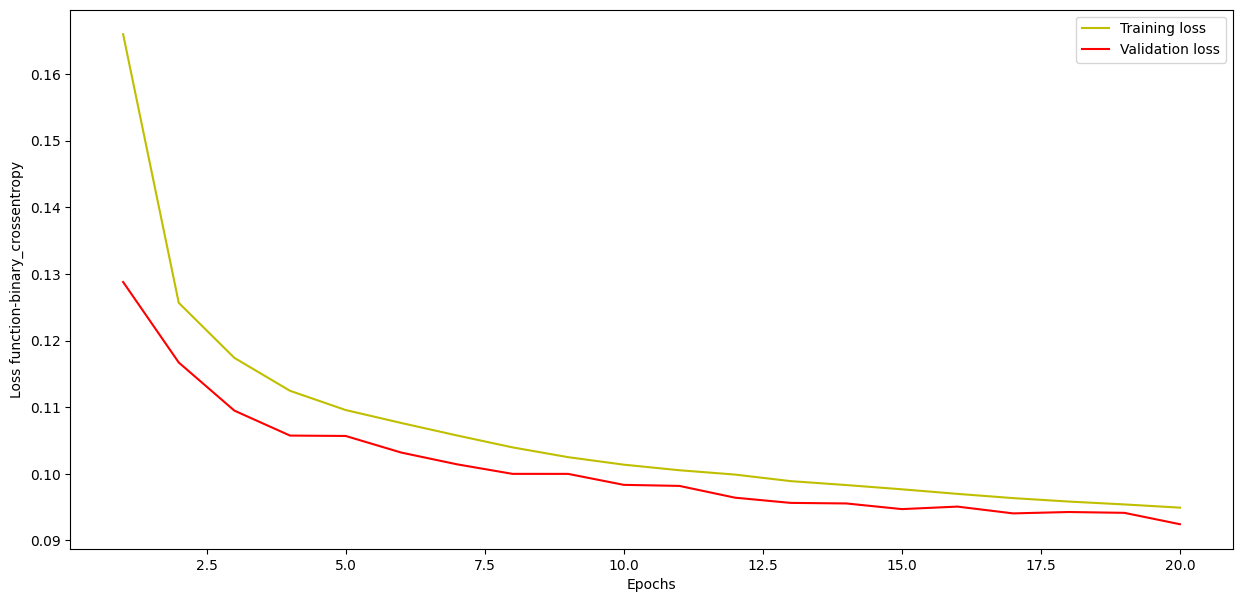

In [35]:
losses=history_2.history['loss']
val_losses=history_2.history['val_loss']
epochs=range(1, len(losses)+1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'y', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function-binary_crossentropy')
plt.legend()
plt.show()

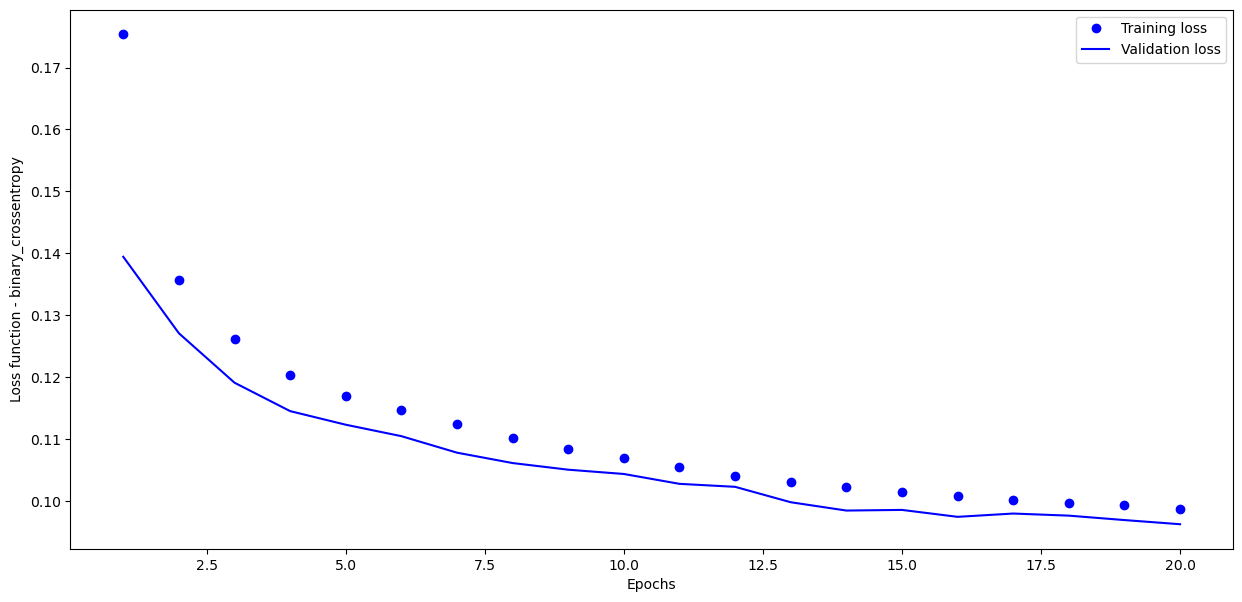

___________________________![image.png](attachment:43697532-dcb7-41bf-a1fa-6f630f5d4a29.png)

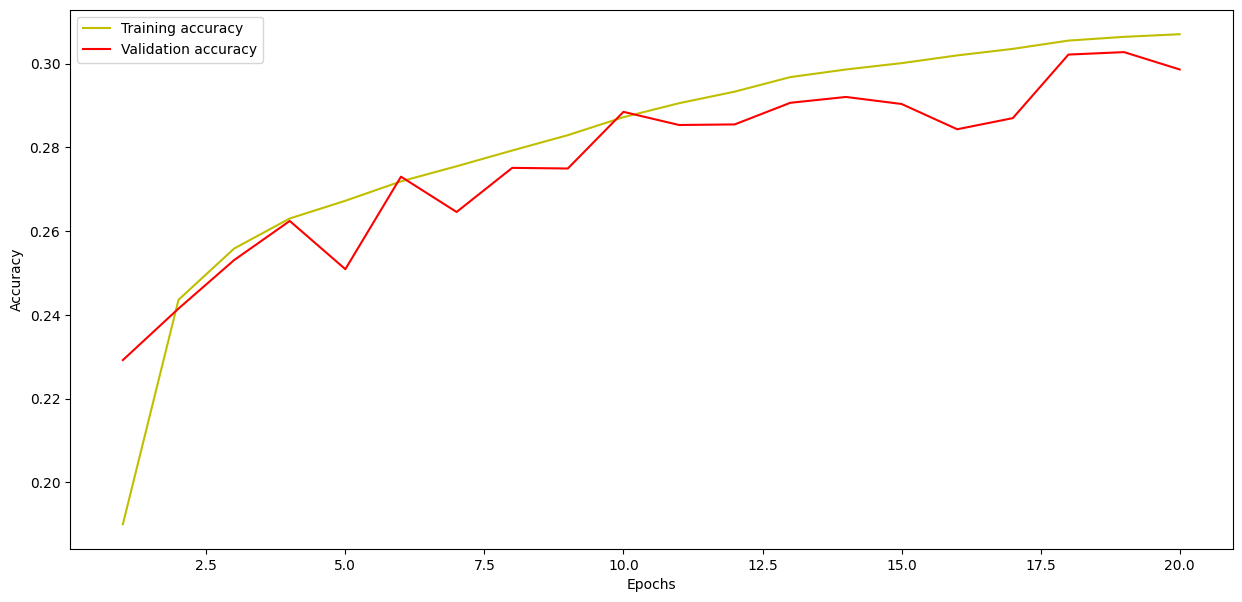

In [36]:
accuracy_array=history.history['accuracy']
val_accuracy_array=history.history['val_accuracy']
epochs=range(1, len(accuracy_array)+1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

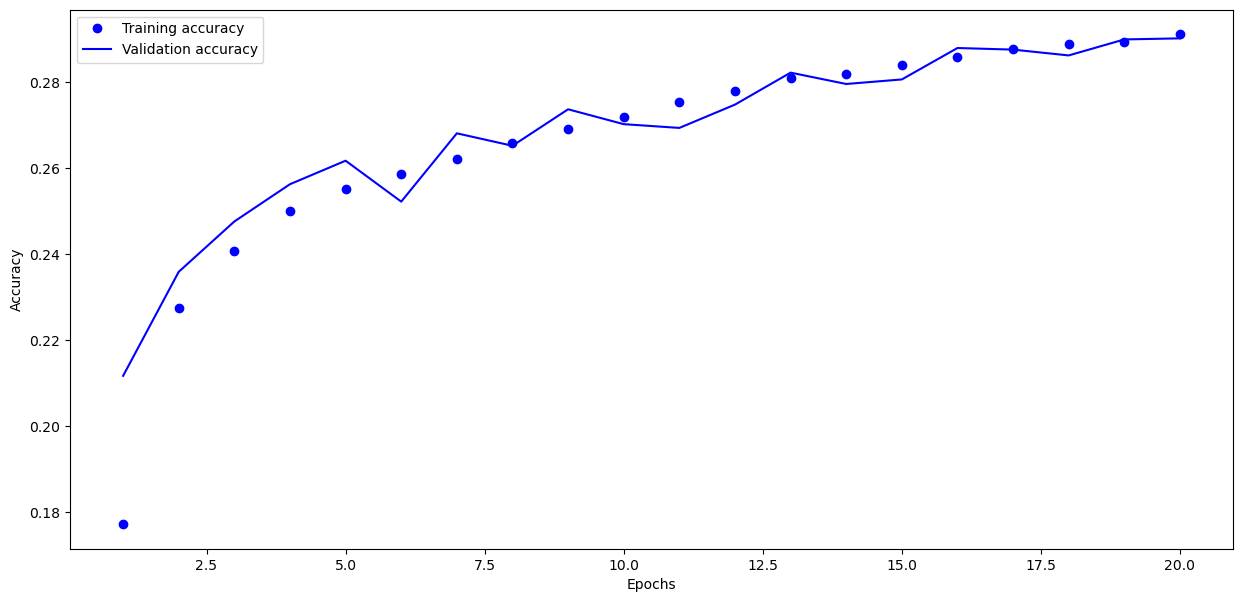

______________________![image.png](attachment:9dbf1489-73d6-4480-adc7-0ced14e0c9dd.png)

In [37]:
hundred_noisey_images=sample(x_test[0:100], training=True)
denoised=noise_remover(hundred_noisey_images[0:100])

______________________![image.png](attachment:a5bc2008-bc25-45e7-97ba-ae44dffae6ed.png)

In [38]:
import random

_______![image.png](attachment:505ed502-6fd8-4f58-a27f-44a804f20493.png)

47
the original


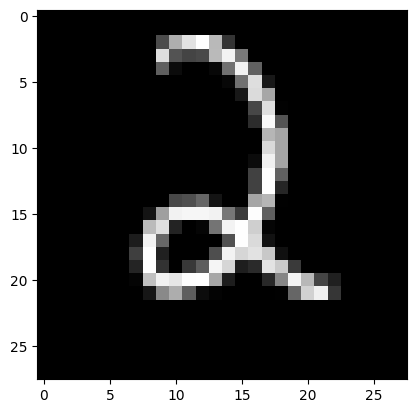

the noisy


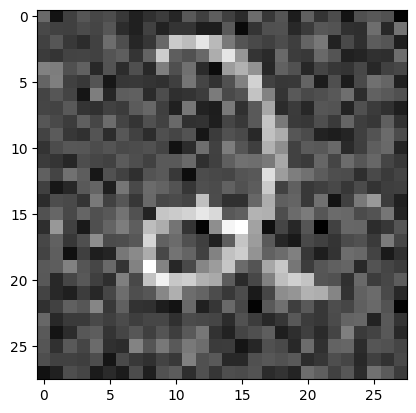

the denoised


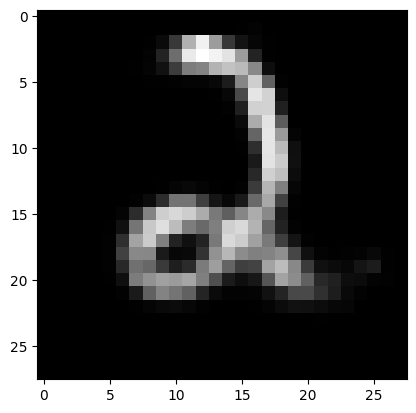

In [39]:
n=random.randint(0,100)
print(n)
print('the original')
plt.imshow(x_test[n])
plt.show()
print('the noisy')
plt.imshow(hundred_noisey_images[n])
plt.show()
print('the denoised')
plt.imshow(denoised[n])
plt.show()

56
The Original


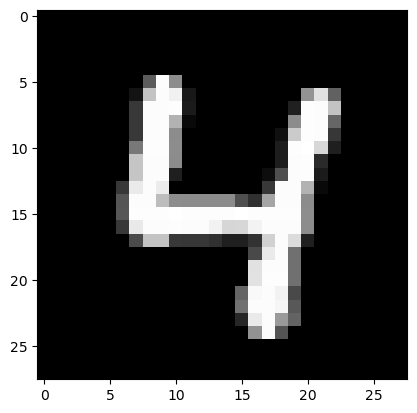

The Noisey Version


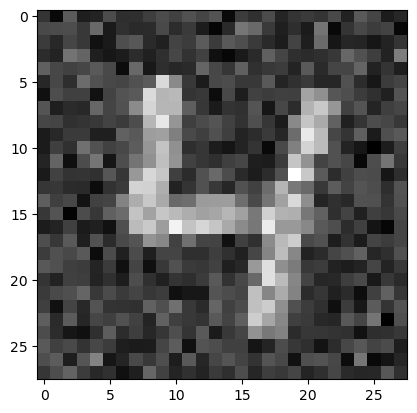

After going through denoiser


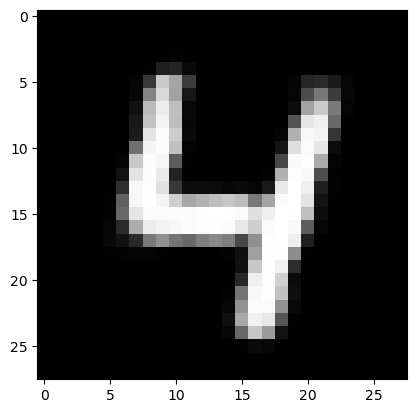

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

 - Put the Encoder, Decoder and Basic Autoencoder models using summary() in your lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present. Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.